Why do 30% of patients miss their scheduled appointments?
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?


## Import Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)

100%|██████████| 2.40M/2.40M [00:00<00:00, 2.86MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

no_show_df = pd.read_csv(f'{path}/KaggleV2-May-2016.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Analysis

### 1. Distribution of Appointment Attendance


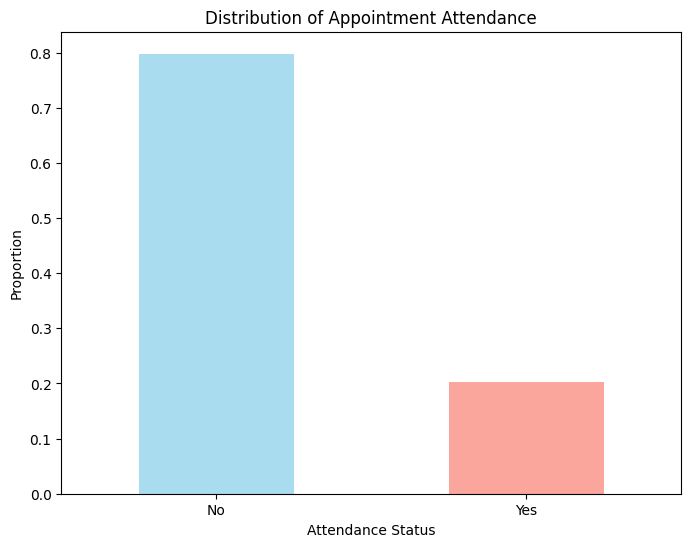

In [7]:
plt.figure(figsize=(8, 6))
no_show_df['No-show'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Distribution of Appointment Attendance')
plt.xlabel('Attendance Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

This bar chart highlights the overall no-show rate, which is crucial for understanding the extent of the problem in the dataset. By showing the proportion of missed and attended appointments, it sets the context for further analysis.



###2. Age Distribution by Attendance Status




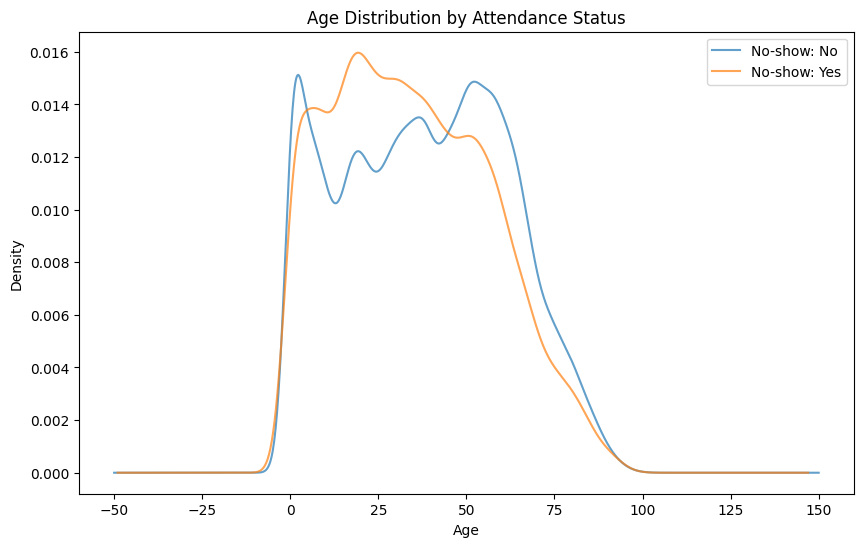

In [13]:
plt.figure(figsize=(10, 6))
for label in no_show_df['No-show'].unique():
    subset = no_show_df[(no_show_df['No-show'] == label) & (no_show_df['Age'] >= 0) & (no_show_df['Age'] <= 100)]  # Filter for valid ages only
    subset['Age'].plot(kind='kde', label=f'No-show: {label}', alpha=0.7)
plt.title('Age Distribution by Attendance Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


This visualization compares the age distribution of patients who attended their appointments against those who missed them. It is significant as it may reveal whether certain age groups are more likely to miss their appointments, helping in targeted intervention.



###3. Attendance Rate by Waiting Time

<ipython-input-14-8dea45e4db38>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_by_waiting = no_show_df.groupby(waiting_time_bins)['No-show'].apply(lambda x: (x == 'No').mean())


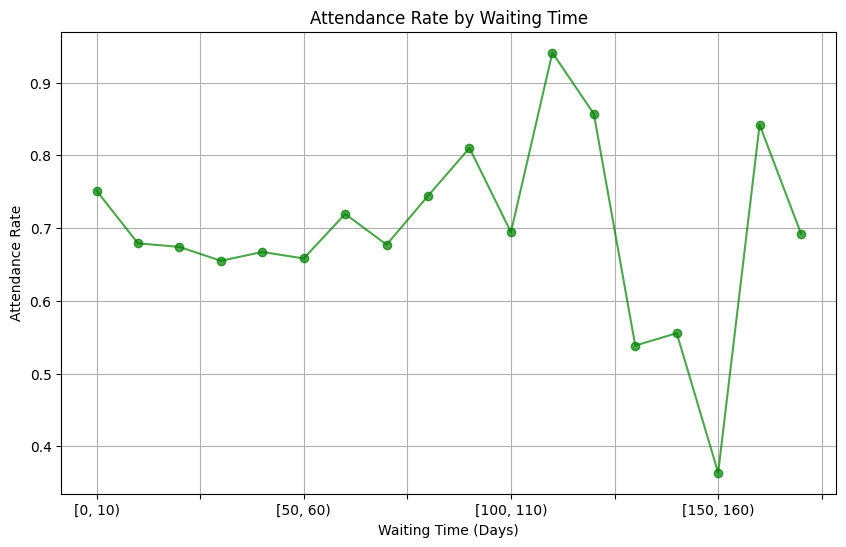

In [14]:
no_show_df['ScheduledDay'] = pd.to_datetime(no_show_df['ScheduledDay'])
no_show_df['AppointmentDay'] = pd.to_datetime(no_show_df['AppointmentDay'])
no_show_df['WaitingTime'] = (no_show_df['AppointmentDay'] - no_show_df['ScheduledDay']).dt.days

waiting_time_bins = pd.cut(no_show_df['WaitingTime'], bins=range(0, no_show_df['WaitingTime'].max() + 10, 10), right=False)
attendance_by_waiting = no_show_df.groupby(waiting_time_bins)['No-show'].apply(lambda x: (x == 'No').mean())

plt.figure(figsize=(10, 6))
attendance_by_waiting.plot(kind='line', marker='o', color='green', alpha=0.7)
plt.title('Attendance Rate by Waiting Time')
plt.xlabel('Waiting Time (Days)')
plt.ylabel('Attendance Rate')
plt.grid(True)
plt.show()


This calculates WaitingTime dynamically using the appointment and scheduling dates. The chart highlights how the delay between scheduling and the appointment affects attendance rates, offering actionable insights to improve scheduling policies.

The x-axis represents waiting time, grouped into bins. Each bin shows a range of days between the appointment's scheduling date (ScheduledDay) and the actual appointment date (AppointmentDay). For example:

1.   A bin labeled "[0-10)" means the waiting time for appointments in this group is between 0 and 9 days.

2.   A bin labeled "[10-20)" represents waiting times between 10 and 19 days, and so on.




###4. Attendance Rate by SMS Reminder

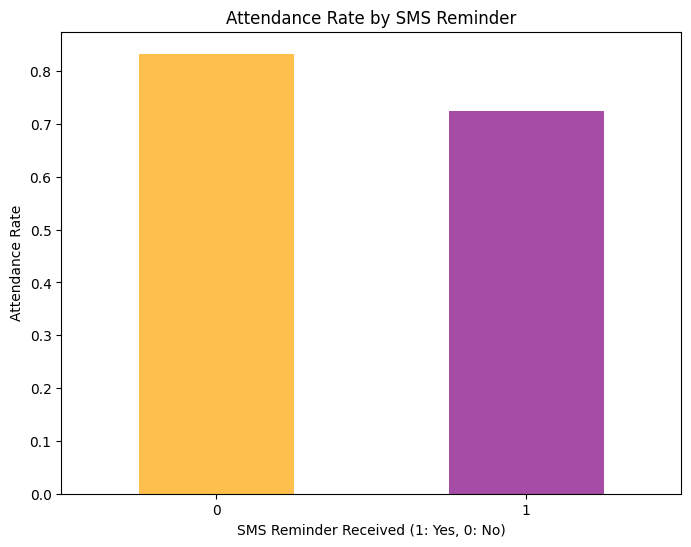

In [15]:
plt.figure(figsize=(8, 6))
attendance_by_sms = no_show_df.groupby('SMS_received')['No-show'].apply(lambda x: (x == 'No').mean())
attendance_by_sms.plot(kind='bar', color=['orange', 'purple'], alpha=0.7)
plt.title('Attendance Rate by SMS Reminder')
plt.xlabel('SMS Reminder Received (1: Yes, 0: No)')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=0)
plt.show()


###5. Attendance Rate by Day of the Week


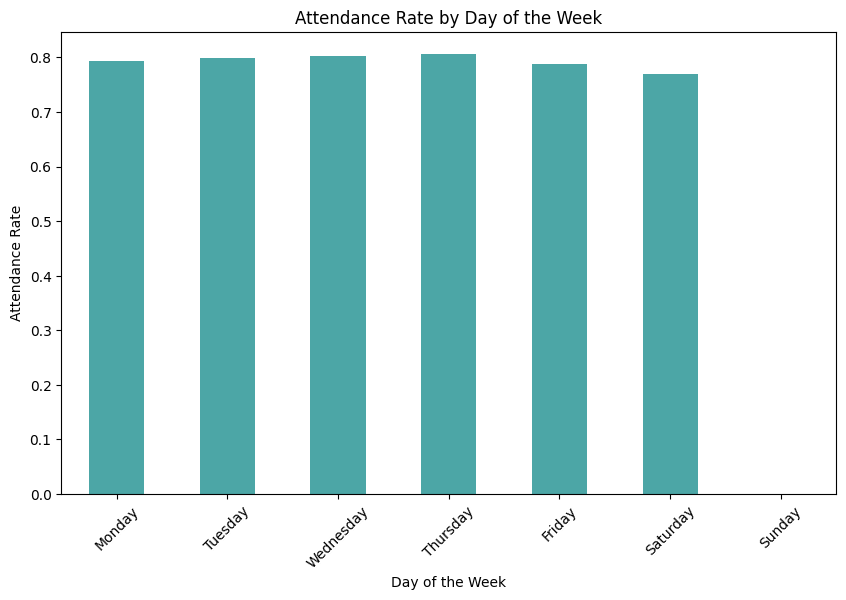

In [16]:
no_show_df['DayOfWeek'] = no_show_df['AppointmentDay'].dt.day_name()

attendance_by_day = no_show_df.groupby('DayOfWeek')['No-show'].apply(lambda x: (x == 'No').mean()).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
attendance_by_day.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Attendance Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.show()


The DayOfWeek is extracted from AppointmentDay for a detailed view of attendance trends across the week. This allows identification of specific days with higher no-show rates, aiding in resource optimization

##2. Basic Model Pipeline

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import xgboost as xgb

In [42]:
# Create a binary target column (1 for "Yes", 0 for "No")
no_show_df['No-show'] = LabelEncoder().fit_transform(no_show_df['No-show'])

# Ensure 'AppointmentDay' is datetime to extract 'DayOfWeek'
no_show_df['AppointmentDay'] = pd.to_datetime(no_show_df['AppointmentDay'])
no_show_df['DayOfWeek'] = no_show_df['AppointmentDay'].dt.day_name()

# Encode categorical columns
categorical_columns = ['Gender', 'Scholarship', 'SMS_received','Neighbourhood', 'DayOfWeek']
data_encoded = pd.get_dummies(no_show_df, columns=categorical_columns, drop_first=True)

# Drop unnecessary columns
columns_to_drop = ['AppointmentDay', 'ScheduledDay']  # These are datetime fields
data_encoded = data_encoded.drop(columns=columns_to_drop, axis=1)

# Define features (X) and target (y)
X = data_encoded.drop('No-show', axis=1)
y = data_encoded['No-show']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)
print(y_pred[:20])

[0.14087066 0.44594753 0.12684669 0.46060917 0.17295954 0.21053098
 0.16491646 0.07101644 0.07027314 0.25366315 0.8317235  0.24303712
 0.00650521 0.07627674 0.01995973 0.2487373  0.2912258  0.20419393
 0.050276   0.11631279]


Since the problem is binary classification problem, we will implement a threshold for converting the continuous output to binary values

In [43]:
# Apply threshold to convert predictions to binary
y_pred_binary = (y_pred >= 0.5).astype(int)


In [44]:
print(y_pred_binary[:20])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


### classification report and confussion matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     17669
           1       0.51      0.06      0.10      4437

    accuracy                           0.80     22106
   macro avg       0.66      0.52      0.49     22106
weighted avg       0.75      0.80      0.73     22106



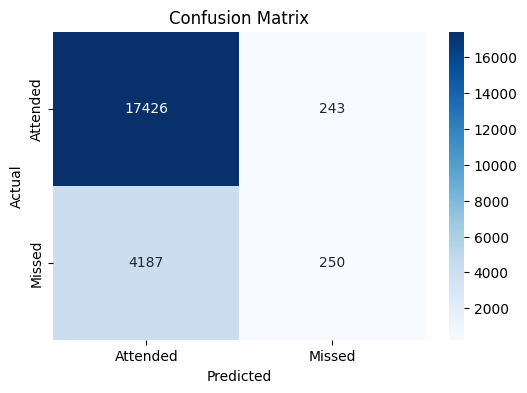

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix Plot with Clearer Labels
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Attended', 'Missed'], yticklabels=['Attended', 'Missed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 3. Error Analysis

###1. Performance on "Attended" vs. "Missed" Classes
* "Attended" (Class 0):
  *   Precision: 0.81 (The model correctly identifies 81% of the patients who attended.)

  *   Recall: 0.99 (The model correctly identifies 99% of all the actual attendees.)

  *   The model is very good at identifying patients who attended the appointment.


* "Missed" (Class 1):
  *   Precision: 0.51 (Only 51% of the predicted missed appointments are correct.)

  *   Recall: 0.06 (The model misses 94% of the actual no-shows.)

  *   The model struggles significantly with identifying no-shows, leading to a very low recall.

####2. Why the Model Performs Better for "Attended"?
**Class Imbalance:**

The dataset appears to be imbalanced, with significantly more "Attended" cases (17,669) compared to "Missed" cases (4,437).
Imbalanced datasets often bias the model toward the majority class ("Attended").
Note: Even a 'dumb' model that will always predict No-Show:No(Attended) will identify 80% of the patients who attended.

**Predictive Features:**

Features like SMS_received, Scholarship, or DayOfWeek might correlate more strongly with attendance rather than missed appointments.
The model likely relies on features that are better at identifying attendance patterns.


###3. Overestimating vs. Underestimating
* Mostly Overestimating "Attended" (Class 0):
 * The model predicts "Attended" too often, leading to false negatives for "Missed" (4,187 cases in the confusion matrix).

 * This overestimation occurs because the model prioritizes the majority class (attendees) and fails to generalize well to no-shows.

###4. Are Some Features Sabotaging the Model?
Potentially Problematic Features:

* Neighbourhood: If there is a strong correlation between certain neighborhoods and no-shows, but the model doesn't learn it well, it may misclassify those samples since we used dummy variables.

* AppointmentID: Completely uninformative feature that should not be used

* PatientID: Completely uninformative feature that should not be used

code below:


Number of Neighbourhood dummy variables: 80
Total Importance of Neighbourhood features: 0.7814


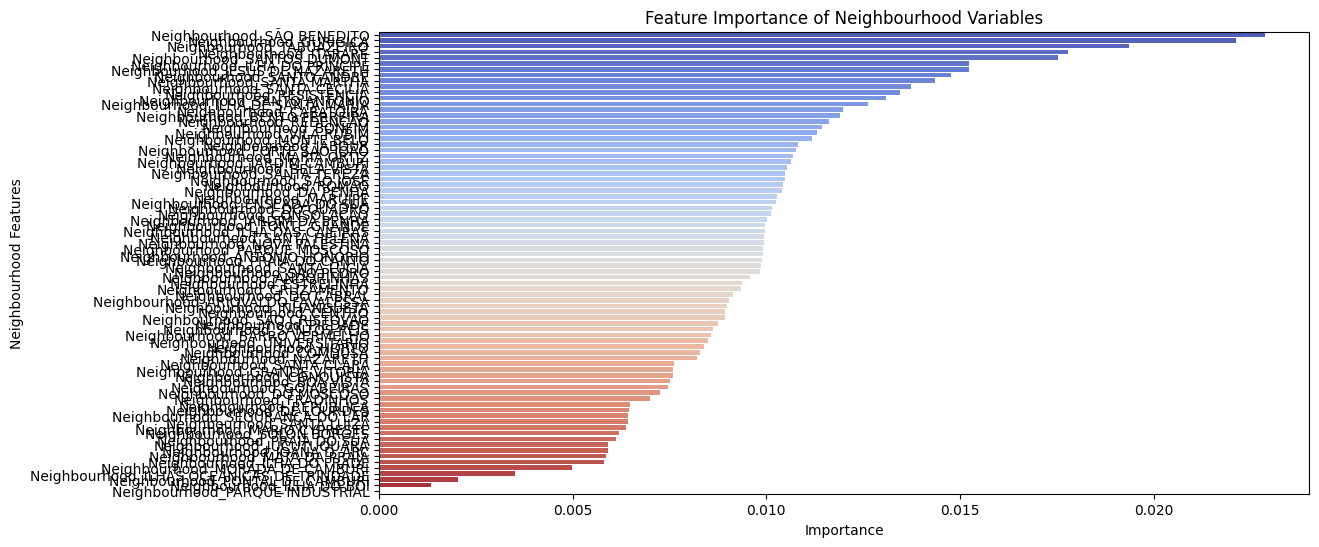

In [73]:
# Code for finding bad features
feature_importance = xg_reg.feature_importances_

# Map feature importance to feature names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Count the number of dummy variables for Neighbourhood
neighborhood_columns = [col for col in data_encoded.columns if 'Neighbourhood' in col]
print(f"Number of Neighbourhood dummy variables: {len(neighborhood_columns)}")

# Aggregate feature importance for Neighbourhood
neighborhood_importance = feature_importance_df[feature_importance_df['Feature'].str.contains('Neighbourhood')]
total_neighborhood_importance = neighborhood_importance['Importance'].sum()
print(f"Total Importance of Neighbourhood features: {total_neighborhood_importance:.4f}")

# Plot the individual importance of Neighbourhood dummy variables
plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_importance.sort_values(by='Importance', ascending=False), x='Importance', y='Feature',hue='Feature', palette='coolwarm')
plt.title('Feature Importance of Neighbourhood Variables')
plt.xlabel('Importance')
plt.ylabel('Neighbourhood Features')
plt.show()


### Findings:
1. Large Number of Dummy Variables:

  The number of dummy variables for Neighbourhood is very high, it can increase model complexity and lead to overfitting or poor generalization.

2. Low Aggregate Importance:

  The total importance of Neighbourhood dummy variables is low despite the large number of features, it confirms that they may be sabotaging the model.

3. Individual Importance:

  Some specific neighborhoods may have high importance, but most may have negligible contributions.

### More analysis regarding thr model features:

Lets take a look on the top 10 feature importance

<Figure size 1200x800 with 0 Axes>

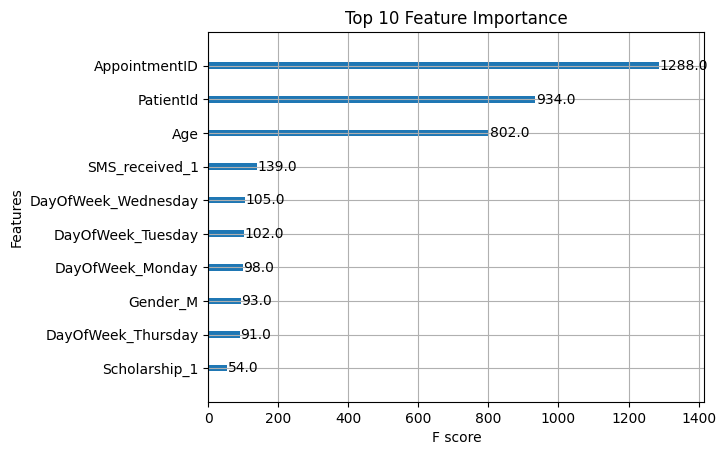

In [69]:
from xgboost import plot_importance

# Plot feature importance using XGBoost's built-in function
plt.figure(figsize=(12, 8))
plot_importance(xg_reg, max_num_features=10, importance_type='weight', show_values=True)
plt.title('Top 10 Feature Importance')
plt.show()


1. AppointmentID and PatientID:

  These IDs are likely unique identifiers and **should not** contribute to prediction.

  Their high importance suggests the model might be overfitting to patterns in the data tied to these unique values (e.g., correlations with the target that exist by chance).
2. Age:

  Age is the third most important feature, which is expected, as age might correlate with attendance habits (e.g., older patients might attend more regularly).
3. DayOfWeek:

  Features like DayOfWeek_Wednesday, DayOfWeek_Tuesday, and others are also important, which aligns with expectations as appointment attendance might vary by day.
4. SMS_received_1:

  SMS reminders have some predictive power, indicating they do influence attendance.
5. Scholarship_1:

  Scholarship has the least importance in the top 10, suggesting it has minimal influence on predictions.

### 5.Commonalities between the erroneous samples

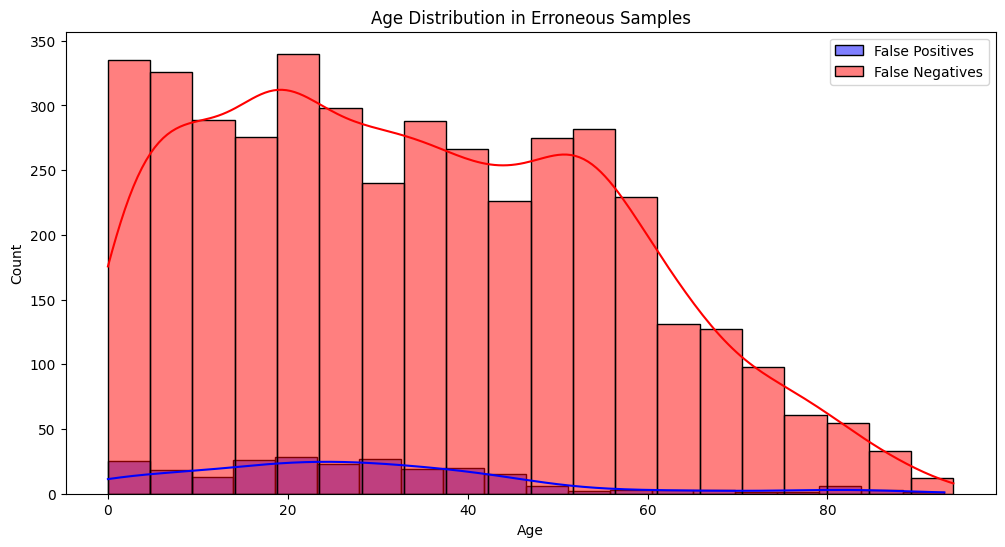

In [81]:
# Create a DataFrame with predictions and true labels
results_df = X_test.copy()
results_df['True_Label'] = y_test
results_df['Predicted_Label'] = y_pred_binary

# Identify erroneous samples
false_positives = results_df[(results_df['True_Label'] == 0) & (results_df['Predicted_Label'] == 1)]
false_negatives = results_df[(results_df['True_Label'] == 1) & (results_df['Predicted_Label'] == 0)]

# Visualize distributions for common features in errors
plt.figure(figsize=(12, 6))
sns.histplot(false_positives['Age'], bins=20, color='blue', label='False Positives', kde=True)
sns.histplot(false_negatives['Age'], bins=20, color='red', label='False Negatives', kde=True)
plt.title('Age Distribution in Erroneous Samples')
plt.xlabel('Age')
plt.legend()
plt.show()



###Observations:
1. False Negatives (Red):

* Dominant Across All Age Groups: The model struggles significantly with identifying no-shows (False Negatives = predicted "Attended" but actually "Missed").
* Younger Age Groups (0–30):
  * The highest concentration of false negatives occurs in younger age groups.

 * This might indicate the model underestimates the likelihood of younger patients missing their appointments.

* Older Age Groups (Above 60):
 * There are fewer errors overall in this age range, suggesting the model performs better for older patients.

2. False Positives (Blue):

* Consistently Low Across All Ages:
 * False positives are less frequent compared to false negatives.

 * This indicates the model is cautious in predicting no-shows, leading to underprediction of the "Missed" class.